In [53]:
import pandas as pd
import getpass
import sqlalchemy as sa
import numpy as np
import seaborn as sns
import matplotlib as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import quantile_transform
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder  ##. better to use dummy from pandas 
from sklearn.preprocessing import PowerTransformer
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.feature_selection import RFE
pd.options.display.max_rows = 50
## Install xlrd package to load Excel files
# conda install openpyxl
## conda install xlrd

### Connecting to Mysql and creating db 

In [63]:
driver = 'mysql+pymysql'
user = 'root'
password = getpass.getpass(prompt='Your password:'"")
ip = 'localhost' 

Your password:········


In [64]:
connection_string = f'{driver}://{user}:{password}@{ip}'

In [65]:
db_connection = sa.create_engine(connection_string)

## 1. Create a database called `house_price_regression`.

In [57]:
#querry = """
#CREATE DATABASE IF NOT EXISTS house_price_regression
#"""

In [58]:
#db_connection.execute(querry)
#db_connection.execute("commit")

In [59]:
#insp = sa.inspect(db_connection)
#db_list = insp.get_schema_names()
#print(db_list)

## 2. Create a table `house_price_data` with the same columns as given in the csv file. Please make sure you use the correct data types for the columns. You can find the names of the headers for the table in the `regression_data.xls` file. Use the same column names as the names in the excel file. Please make sure you use the correct data types for each of the columns.

In [66]:
house_price_df = pd.read_excel('C:/Users/Lenovo/Documents/GitHub/IronChristoph/MidTerm_Project/Data/Data_MidTerm_Project_Real_State_Regression.xls')
house_price_df.info()
house_price_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     21597 non-null  int64         
 8   view           21597 non-null  int64         
 9   condition      21597 non-null  int64         
 10  grade          21597 non-null  int64         
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  int64         
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   21597 non-null  int64         
 15  zipcode        2159

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,3,2.50,1530,1131,3.0,0,0,3,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
21593,6600060120,2015-02-23,4,2.50,2310,5813,2.0,0,0,3,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
21594,1523300141,2014-06-23,2,0.75,1020,1350,2.0,0,0,3,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101
21595,291310100,2015-01-16,3,2.50,1600,2388,2.0,0,0,3,...,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000


## 3. Import the data from the csv file into the table. Before you import the data into the empty table, make sure that you have deleted the headers from the csv file. (in this case we have already deleted the header names from the csv files).  To not modify the original data, if you want you can create a copy of the csv file as well. Note you might have to use the following queries to give permission to SQL to import data from csv files in bulk

In [61]:
#house_price_df.to_sql(name="house_price_data", con=db_connection, if_exists = 'replace', schema='house_price_regression' )

OperationalError: (pymysql.err.OperationalError) (1045, "Access denied for user 'root'@'localhost' (using password: YES)")
(Background on this error at: https://sqlalche.me/e/14/e3q8)

In [67]:
table_info = db_connection.execute("""SELECT *
FROM INFORMATION_SCHEMA.COLUMNS
WHERE TABLE_NAME = 'house_price_data'
ORDER BY ORDINAL_POSITION

""")
pd.DataFrame(table_info)


,TABLE_CATALOG,TABLE_SCHEMA,TABLE_NAME,COLUMN_NAME,ORDINAL_POSITION,COLUMN_DEFAULT,IS_NULLABLE,DATA_TYPE,CHARACTER_MAXIMUM_LENGTH,CHARACTER_OCTET_LENGTH,...,DATETIME_PRECISION,CHARACTER_SET_NAME,COLLATION_NAME,COLUMN_TYPE,COLUMN_KEY,EXTRA,PRIVILEGES,COLUMN_COMMENT,GENERATION_EXPRESSION,SRS_ID
0,def,house_price_regression,house_price_data,index,1,None,YES,bigint,None,None,...,None,None,None,bigint,MUL,,"select,insert,update,references",,,None
1,def,house_price_regression,house_price_data,id,2,None,YES,bigint,None,None,...,None,None,None,bigint,,,"select,insert,update,references",,,None
2,def,house_price_regression,house_price_data,bedrooms,3,None,YES,bigint,None,None,...,None,None,None,bigint,,,"select,insert,update,references",,,None
3,def,house_price_regression,house_price_data,bathrooms,4,None,YES,double,None,None,...,None,None,None,double,,,"select,insert,update,references",,,None
4,def,house_price_regression,house_price_data,sqft_living,5,None,YES,bigint,None,None,...,None,None,None,bigint,,,"select,insert,update,references",,,None
5,def,house_price_regression,house_price_data,sqft_lot,6,None,YES,bigint,None,None,...,None,None,None,bigint,,,"select,insert,update,references",,,None
6,def,house_price_regression,house_price_data,floors,7,None,YES,double,None,None,...,None,None,None,double,,,"select,insert,update,references",,,None
7,def,house_price_regression,house_price_data,waterfront,8,None,YES,bigint,None,None,...,None,None,None,bigint,,,"select,insert,update,references",,,None
8,def,house_price_regression,house_price_data,view,9,None,YES,bigint,None,None,...,None,None,None,bigint,,,"select,insert,update,references",,,None
9,def,house_price_regression,house_price_data,condition,10,None,YES,bigint,None,None,...,None,None,None,bigint,,,"select,insert,update,references",,,None


In [68]:
hp_table = db_connection.execute("SELECT * FROM house_price_regression.house_price_data")

hp_table = pd.DataFrame(hp_table)
hp_table.drop('index', axis=1, inplace = True)
hp_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     21597 non-null  int64  
 7   view           21597 non-null  int64  
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  int64  
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   21597 non-null  int64  
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  int64  
 18  sqft_l

## 5 Use the alter table command to drop the column date from the database, as we would not use it in the analysis with SQL. Select all the data from the table to verify if the command worked. Limit your returned results to 10.

In [ ]:
#db_connection.execute("""ALTER TABLE house_price_regression.house_price_data
#                            DROP COLUMN date""")
#db_connection.execute("commit")

In [ ]:
#sql_return = db_connection.execute(""" SELECT * FROM house_price_regression.house_price_data
#                            LIMIT 10""")
#pd.DataFrame(sql_return)

In [69]:
hp_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     21597 non-null  int64  
 7   view           21597 non-null  int64  
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  int64  
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   21597 non-null  int64  
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  int64  
 18  sqft_l

In [70]:
hp_table.columns

Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price'],
      dtype='object')

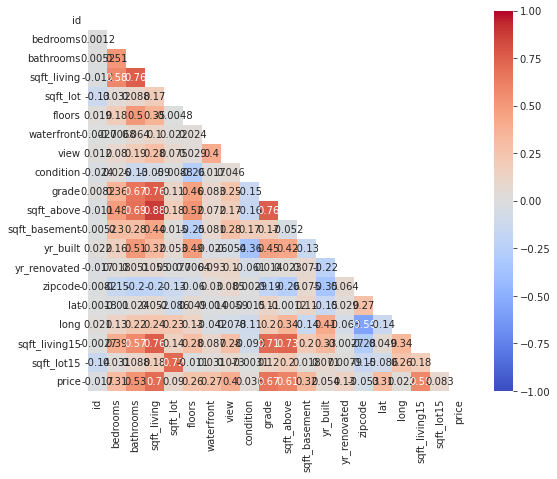

In [76]:
corr = hp_table.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

In [72]:
hp_table.columns

Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price'],
      dtype='object')

In [73]:
corr_matrix=hp_table.corr().abs()
upper_triangle=corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))
drop_col = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.75 )]

In [74]:
drop_col

['sqft_living', 'grade', 'sqft_above', 'sqft_living15']

In [79]:
hp_table.drop(drop_col, axis=1, inplace = True)

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'sqft_lot'}>],
       [<AxesSubplot:title={'center':'waterfront'}>,
        <AxesSubplot:title={'center':'view'}>,
        <AxesSubplot:title={'center':'condition'}>],
       [<AxesSubplot:title={'center':'sqft_basement'}>,
        <AxesSubplot:title={'center':'yr_built'}>,
        <AxesSubplot:title={'center':'yr_renovated'}>],
       [<AxesSubplot:title={'center':'zipcode'}>,
        <AxesSubplot:title={'center':'sqft_lot15'}>,
        <AxesSubplot:title={'center':'price'}>]], dtype=object)

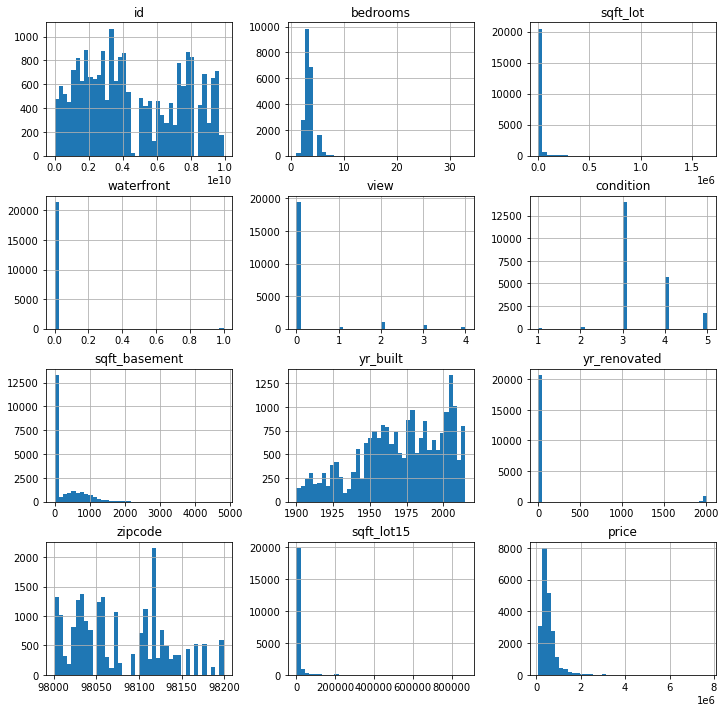

In [80]:
hp_table.select_dtypes('int').hist(figsize=(12,12), bins=40)


In [85]:
## Transform int to object
to_obj = ['view', 'condition', 'waterfront']
hp_table[to_obj] = hp_table[to_obj].astype('object')
hp_table.info()
## yr_renovated problematic: 0 have to be changed 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_lot       21597 non-null  int64  
 4   floors         21597 non-null  float64
 5   waterfront     21597 non-null  object 
 6   view           21597 non-null  object 
 7   condition      21597 non-null  object 
 8   sqft_basement  21597 non-null  int64  
 9   yr_built       21597 non-null  int64  
 10  yr_renovated   21597 non-null  int64  
 11  zipcode        21597 non-null  int64  
 12  lat            21597 non-null  float64
 13  long           21597 non-null  float64
 14  sqft_lot15     21597 non-null  int64  
 15  price          21597 non-null  int64  
dtypes: float64(4), int64(9), object(3)
memory usage: 2.6+ MB


## Transforming to normal distribution

In [86]:
pt = PowerTransformer()
qt = QuantileTransformer(output_distribution="normal")

In [137]:
# sqft_lot

def normalize(column, method=pt):
    fig, ax = plt.subplots(1,2,figsize=(14,4))
    sns.displot(ax=x[0], hp_table[column])
    pt = PowerTransformer()
    qt = QuantileTransformer(output_distribution="normal")
    if method == pt:
        transformed = pt.fit_transform(hp_table[column].to_numpy().reshape(-1,1))
    elif method == qt:
        transformed = qt.fit_transform(hp_table[column].to_numpy().reshape(-1,1))
    sns.displot(ax=ax[1], transformed)
    ax
    return transformed

normalize('yr_built')
#def insert_transformed()
#    hp_table['sqft_lot']= sqft_lot_transformed
#    df.drop(['sqft_lot'],axis=1,inplace=True)

SyntaxError: positional argument follows keyword argument (2386190741.py, line 5)

In [138]:
import os
os.getcwd()

'C:\\Users\\Lenovo\\Documents\\GitHub\\IronChristoph\\MidTerm_Project\\Modeling_Project'

## Split X-y

In [95]:
X=hp_table.drop('price', axis=1)
y=hp_table['price']


In [99]:
X.columns

Index(['id', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'sqft_basement',
       'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_lot15'],
      dtype='object')

In [102]:
X = X._get_numeric_data()
X.drop(['id', 'lat', 'long', 'zipcode'], axis=1, inplace=True)

KeyError: "['id', 'lat', 'long', 'zipcode'] not found in axis"

array([[<AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'sqft_lot'}>],
       [<AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'sqft_basement'}>,
        <AxesSubplot:title={'center':'yr_built'}>],
       [<AxesSubplot:title={'center':'yr_renovated'}>,
        <AxesSubplot:title={'center':'sqft_lot15'}>, <AxesSubplot:>]],
      dtype=object)

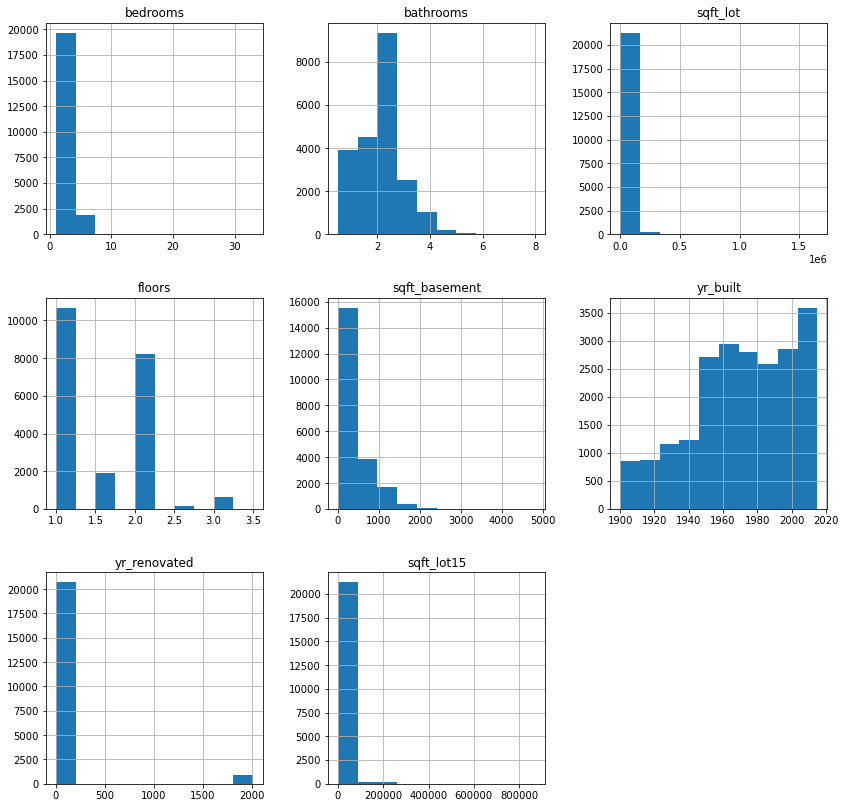

In [103]:
X.hist(figsize=(14,14))

In [107]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=123)

### standardize

In [120]:
std_scaler=StandardScaler().fit(X_train)   ##. finding the parameters ( mean, variance from the training set )
                                            ## 
X_train_scaled=std_scaler.transform(X_train)

In [121]:
X_train.shape

(15117, 8)

In [122]:
X_test_scaled=std_scaler.transform(X_test)
X_test_scaled.shape

(6480, 8)

## Linear Regression

In [123]:
model=LinearRegression()    # model
model.fit(X_train_scaled, y_train)   # model train

LinearRegression()

In [124]:
model.coef_

array([ -3389.03258207, 188041.31383845,   8186.29958341,  62552.99671088,
        70771.18458587, -94343.05402295,   8273.40214932,  12673.52543646])

In [125]:
y_pred=model.predict(X_test_scaled)   # model prediction

y_pred_train=model.predict(X_train_scaled)

In [126]:
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})

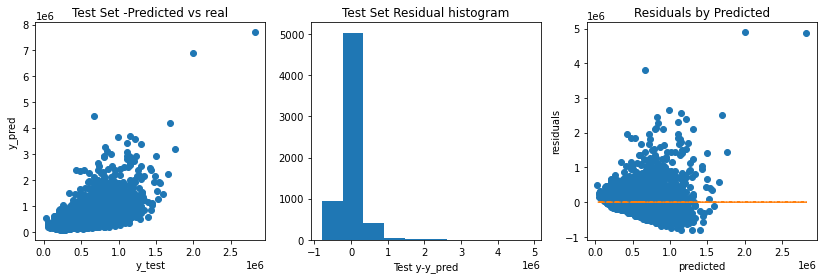

In [128]:
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred,"o")
ax[2].set_xlabel("predicted")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

In [129]:
print('MSE test: ',  mse(y_test,y_pred))
print('MAE test: ', mae(y_test,y_pred))
print('MSE train: ', mse(y_train,y_pred_train))
print('RMSE test: ', np.sqrt(mae(y_test,y_pred)))
R2_test=model.score(X_test_scaled,y_test)
R2_train=model.score(X_train_scaled,y_train)
print('R2_test: ', R2_test)
print('R2_train: ', R2_train)

print('MSE train - MSE test: ', mse(y_train,y_pred_train) - mse(y_test,y_pred) )
print('R2_test/R2_train: ', R2_test/R2_train )
Adj_R2= 1 - (1-R2_test)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('Adj_R2:', Adj_R2)

MSE test:  88998888066.84274
MAE test:  189724.9727669807
MSE train:  83596073837.9821
RMSE test:  435.5743022343957
R2_test:  0.36392286869298407
R2_train:  0.37062838959045763
MSE train - MSE test:  -5402814228.8606415
R2_test/R2_train:  0.98190769761355
Adj_R2: 0.3631364960998059


**First Model: with outliers, not normalized, not scaled:**

MSE test:  88998888066.76543

MAE test:  189724.9727667783

MSE train:  83596073837.9821

RMSE test:  435.5743022341634
 
R2_test:  0.3639228686935366

R2_train:  0.37062838959045763

MSE train - MSE test:  -5402814228.783325

R2_test/R2_train:  0.9819076976150408

Adj_R2: 0.36313649610035914


**2nd Model: Scaled**

MSE test:  88998888066.84274

MAE test:  189724.9727669807

MSE train:  83596073837.9821

RMSE test:  435.5743022343957

R2_test:  0.36392286869298407

R2_train:  0.37062838959045763

MSE train - MSE test:  -5402814228.8606415

R2_test/R2_train:  0.98190769761355

Adj_R2: 0.3631364960998059